<h1 style="color: red">My Own Sk-Learn</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/Arbaz Khan/Data Science/Linear Regression/house_prices_additional_features.csv")

In [3]:
df.head()

,SquareFeet,Bedrooms,Bathrooms,Age,Price
0,1500,3,2,10,200000
1,2000,4,3,5,300000
2,1200,2,1,15,150000
3,2500,4,3,8,350000
4,1800,3,2,20,220000


In [4]:
# Taking Labels And Features as X, Y
X = np.array(df.drop("Price", axis="columns"))
Y = np.array(df["Price"])

In [5]:
X, Y

(array([[1500,    3,    2,   10],
        [2000,    4,    3,    5],
        [1200,    2,    1,   15],
        [2500,    4,    3,    8],
        [1800,    3,    2,   20],
        [3000,    5,    4,    2],
        [1400,    2,    1,   12],
        [2200,    4,    2,    7],
        [1600,    3,    2,    6],
        [1900,    3,    2,   25]], dtype=int64),
 array([200000, 300000, 150000, 350000, 220000, 450000, 180000, 280000,
        240000, 210000], dtype=int64))

<h2 style="color: blue">Creating The Our Own Sk-Learn Class</h2>

In [6]:
class sk_learn:
    
    class LinearRegression:
        def __init__(self, X, Y, alpha, epochs):
            self.X = X
            self.Y = Y
            self.alpha = alpha
            self.epochs = epochs
            self.W = np.zeros(X.shape[1])  # Initialize weights based on number of features
            self.b = 0

        def fit(self):
            X_scaled = self.X / self.X.max(axis=0)  # Scale features individually
            m = len(self.X)

            for i in range(self.epochs):
                y_pred = np.dot(X_scaled, self.W) + self.b  # Use dot product for prediction

                dw = (1/m) * np.dot(X_scaled.T, (y_pred - self.Y))
                db = (1/m) * np.sum(y_pred - self.Y)

                self.W = self.W - self.alpha * dw
                self.b = self.b - self.alpha * db

            self.W = self.W / self.X.max(axis=0)  # Normalize weights


        def coef__(self):
            return self.W

        def intercept__(self):
            return self.b

        def predict(self, X_test):
            return np.dot(X_test, self.W) + self.b

        def bestFitLine(self):
            Y_pred = self.predict(self.X)

            plt.scatter(self.X[:, 0], self.Y)  # Assuming X[:, 0] is the first feature
            plt.plot(self.X[:, 0], Y_pred)
            plt.show()

        def r_squared(self):
            y_pred = self.predict(self.X)
            ss_total = np.sum((self.Y - np.mean(self.Y)) ** 2)
            ss_residual = np.sum((self.Y - y_pred) ** 2)
            r2 = 1 - (ss_residual / ss_total)
            return r2
    
    # ==========================================================================================================
    
    class LogisticRegression:
        def __init__(self, X, Y, alpha, epochs):
            self.X = X
            self.Y = Y
            self.alpha = alpha
            self.epochs = epochs
            self.W = np.zeros(X.shape[1]) 
            self.b = 0
        
        def sigmoid(self, Z):
            return 1/(1+np.exp(-Z))
        
        
        def fit(self):
            m = len(self.X)
            for i in range(self.epochs):
                Z = np.dot(self.W, self.X.T) + self.b
                f_wb = self.sigmoid(Z)
                
                dw = (1/m) * np.dot(self.X.T, (f_wb-self.Y))
                db = (1/m) * np.sum(f_wb - self.Y)
                
                self.W = self.W - self.alpha * dw
                self.b = self.b - self.alpha * db
                
        
        def coef_(self):
            return self.W

        def intercept_(self):
            return self.b
        
        def predict(self, X_test):
            Z =  np.dot(X_test, self.W) + self.b
            y_pred = self.sigmoid(Z)
            return np.round(y_pred)
        
        def boudryLine(self):
            # Calculate the decision boundary
            x1_boundary = np.linspace(min(self.X[:, 0]), max(self.X[:, 0]), 100)  # Assuming x has shape (num_samples, num_features)
            x2_boundary = (-self.W[0] * x1_boundary - self.b) / self.W[1]

            # Plot the data points
            plt.scatter(self.X[:, 0], self.X[:, 1], c=self.Y, cmap=plt.cm.Paired, label='Data Points')

            # Plot the decision boundary line
            plt.plot(x1_boundary, x2_boundary, color='green', label='Decision Boundary')


            plt.xlabel('Feature 1')
            plt.ylabel('Feature 2')
            plt.title('Logistic Regression Decision Boundary')
            plt.legend()
            plt.show()

## Testing Linear Regression

In [7]:
model = sk_learn.LinearRegression(X, Y, 0.3, 10000)

In [8]:
model.fit()

In [9]:
model.predict(X)

array([209108.16412303, 298724.69213134, 145678.95380277, 354274.08630586,
       215326.14050306, 447196.91432937, 181785.17153644, 280576.15927844,
       235427.02302787, 211888.29927106])

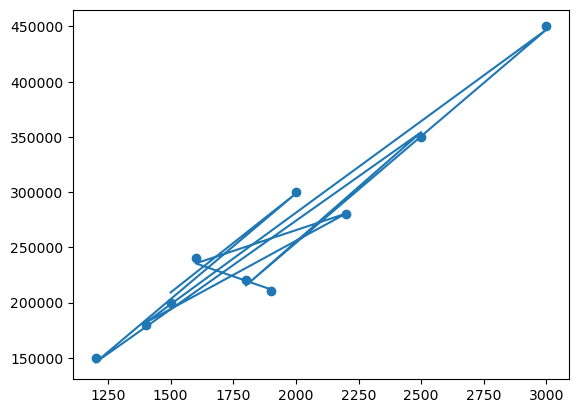

0.9975367900059409

In [10]:
model.bestFitLine()
model.r_squared()

## Testing Logistic Regression

In [11]:
X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
Y = np.array([0, 0, 0, 1, 1, 1])  # n

model = sk_learn.LogisticRegression(X, Y, 0.01, 10000)

In [12]:
model.fit()

In [13]:
model.predict(X)

array([0., 0., 0., 1., 1., 1.])

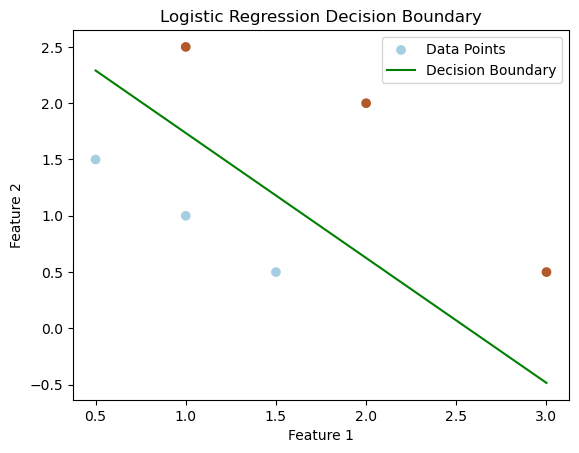

In [14]:
model.boudryLine()